In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
# x_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.30, train_size=0.70)

## Data Augmentation

In [5]:
# https://towardsdatascience.com/image-augmentation-examples-in-python-d552c26f2873

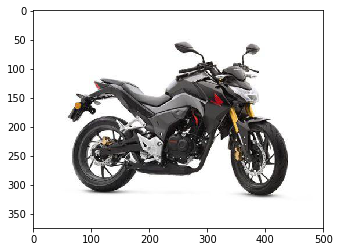

In [2]:
img = Image.open('./moto_crawler1_1_0.jpg')
img = np.array(img)
plt.imshow(img)
plt.show()

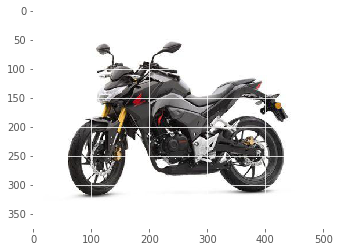

In [26]:
# Flipping images with Numpy
flipped_img = np.fliplr(img)
plt.imshow(flipped_img)
plt.show()

## Cargamos imagenes y labels

In [4]:
import os

In [5]:
# Definimos rutas de imagenes
root_motos = 'D:/universidad/unpsjb/2018/Sistemas de Soporte para la Toma de Decision/Practica/TP FINAL/imagenes/motos'
root_autos = 'D:/universidad/unpsjb/2018/Sistemas de Soporte para la Toma de Decision/Practica/TP FINAL/imagenes/auto sedan'
root_aux1 = 'D:/universidad/unpsjb/2018/Sistemas de Soporte para la Toma de Decision/Practica/TP FINAL/imagenes/borrame1'
root_aux2 = 'D:/universidad/unpsjb/2018/Sistemas de Soporte para la Toma de Decision/Practica/TP FINAL/imagenes/borrame2'

In [6]:
# Para cada categoria, hacemos el siguiente procedimiento: X=imagen, y=numero de categoria.
labels = ['Autoelevador', 'Auto', 'Buggy', 'Camioneta', 'Camion', 'Colectivo',
         'Cuatriciclo', 'Furgon', 'Moto', 'Pala Cargadora']

In [44]:
X = []
y = []

In [45]:
# FUENTE:
# https://pythonprogramming.net/graphing-images-matplotlib/?completed=/more-pixel-arrays/
# https://stackoverflow.com/questions/34976595/using-train-test-split-with-images-from-my-local-directory?rq=1
def cargar_datos_X_Y(ruta_imagen, valor_y):
    for path, subdirs, files in os.walk(ruta_imagen):
        for name in files:
            img_path = os.path.join(path,name)
            #img_pixels = list(Image.open(img_path).getdata())
            #X = np.vstack((X, img_pixels))
            #X.append(img_pixels)
            X.append(np.asarray(Image.open(img_path)))
            y.append(valor_y)

In [46]:
cargar_datos_X_Y(root_aux1,1)

In [47]:
cargar_datos_X_Y(root_aux2,8)

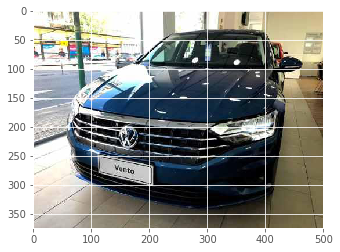

In [48]:
plt.imshow(X[0]) # te muestra la primer imagen
#print(X)
plt.show()

## Dividimos en datos de entrenamiento y datos de prueba

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.30, train_size=0.70)
print(len(y_train))
print(len(y_test))

7
3


## ¿Estan balanceados los datos? Rta: SI

In [50]:
unique, counts = np.unique(y_train, return_counts=True)
print(unique)
print(counts)

[1 8]
[4 3]


## Preprocesamiento

In [ ]:
#normalizamos los datos de entrenamiento y test
X_train = Normalizer().fit_transform(X_train)
X_test = Normalizer().fit_transform(X_test)

In [29]:
from sklearn.metrics import classification_report, confusion_matrix
from utils import mnist_reader
from timeit import default_timer as timer

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA
from ast import literal_eval

import scikitplot as skplt

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import itertools

#X_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
#X_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')

class_names = np.unique(y_test)

### visualizacion de datos de entrenamiento

# defined labels
#labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal',
 #        'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# defined colors, i love this one
colors = ['rgb(0,31,63)', 'rgb(255,133,27)', 'rgb(255,65,54)', 'rgb(0,116,217)', 'rgb(133,20,75)', 'rgb(57,204,204)',
'rgb(240,18,190)', 'rgb(46,204,64)', 'rgb(1,255,112)', 'rgb(255,220,0)',
'rgb(76,114,176)', 'rgb(85,168,104)', 'rgb(129,114,178)', 'rgb(100,181,205)']

# APLICAMOS STANDARD_SCALER    
df_copy_images_ = StandardScaler().fit_transform(X_train)
# APLICAMOS NORMALIZACION
df_copy_images_ = Normalizer().fit_transform(df_copy_images_)
# APLICAMOS PCA CON 2 COMPONENTES
df_copy_images_component = PCA(n_components = 2).fit_transform(df_copy_images_)

# APLICAMOS MEAN_MAX_SCALER: mezclamos los valores ente 0 y 1
df_copy_images_component = MinMaxScaler().fit_transform(df_copy_images_component)

plt.rcParams["figure.figsize"] = [21, 18]

for k, i in enumerate(class_names):
    plt.scatter(df_copy_images_component[y_train == i, 0],
               df_copy_images_component[y_train == i, 1],
               color = '#%02x%02x%02x' % literal_eval(colors[k][3:]),label = labels[k])
plt.legend()
plt.show()

TypeError: list indices must be integers or slices, not tuple

## Algoritmo 1: DummyClassifier

In [55]:
### Entrenamos la maquina Dummy ###
from sklearn.dummy import DummyClassifier
from timeit import default_timer as timer

comienzo = timer()

clf = DummyClassifier(strategy='prior',random_state=0)
clf.fit(X_train, y_train)

fin = timer() - comienzo
print("Tiempo Entrenamiento Dummy:",fin, " segundos")

Tiempo Entrenamiento Dummy: 0.0004890787686235853  segundos


In [56]:
from sklearn.metrics import classification_report, confusion_matrix

dummy_predict = clf.predict(X_test)

fin = timer() - comienzo
print("Tiempo Test Dummy:",fin, " segundos")
print(dummy_predict)
cnf_matrix = confusion_matrix(y_test, dummy_predict)
print(cnf_matrix)

Tiempo Test Dummy: 1.7483635078829138  segundos
[1 1 1]
[[1 0]
 [2 0]]


## Metricas

In [51]:
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    
    plt.rcParams["figure.figsize"] = [8, 5]
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

[[0 1]
 [0 2]]
Normalized confusion matrix
[[0. 1.]
 [0. 1.]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           8       0.67      1.00      0.80         2

   micro avg       0.67      0.67      0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3



c:\users\asus\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\asus\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


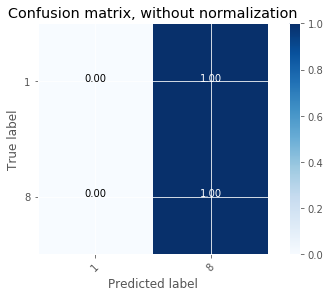

<Figure size 576x360 with 0 Axes>

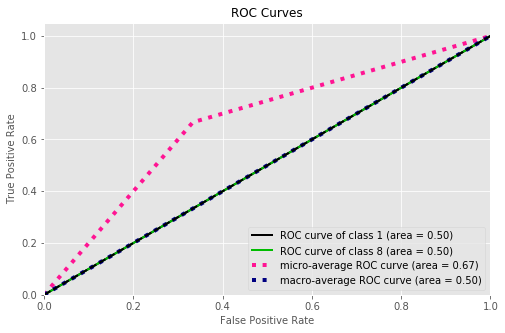

In [52]:
from sklearn.metrics import classification_report, confusion_matrix
import scikitplot as skplt
import sklearn
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline


# Armar confusion matrix
cnf_matrix = confusion_matrix(y_test, dummy_predict)
print(cnf_matrix)
plt.figure()
class_names = np.unique(y_test)
plot_confusion_matrix(cnf_matrix, classes=class_names,title='Confusion matrix, without normalization')



# Tabla de metricas automatica
print(classification_report(y_test, dummy_predict))



# Valor de AUC
#y_score = clf.fit(X_train, y_train)
#auc = sklearn.metrics.roc_auc_score(y_test, y_score, average='macro', sample_weight=None, max_fpr=None)
#print(auc)
#fpr, tpr, thresholds = roc_curve(y_test, [1,8]) #auc kernel lineal
#print(auc(fpr, tpr))




# ploteamos roc curve
plt.figure()
skplt.metrics.plot_roc_curve(y_test,clf.predict_proba(X_test))
plt.show()

## Algoritmo 2: Nearest Neighbors Classification¶

## Algoritmo 3: Random Forest Classifier

## Algoritmo 4: SVM

## Algoritmo 5: Red Neuronal

## Prediccion de datos nuevos

In [67]:
# https://machinelearningmastery.com/make-predictions-scikit-learn/
# new instances where we do not know the answer
#Xnew, _ = make_blobs(n_samples=3, centers=2, n_features=2, random_state=1)
# make a prediction
Xnew = []
Xnew.append(np.asarray(Image.open('./moto_crawler1_1_0.jpg')))
ynew = clf.predict(Xnew)
print(ynew) #---> TE DICE A QUE CLASE PERTENECE ........ 

[1]
